In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/zekiye-kart/data-science/main/week-6/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']] # bağımsız değişken
y = df["CO2EMISSIONS"]# bağımlı değişken
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [21]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [23]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
88,3.0,6,9.9
445,5.3,8,16.5
270,3.6,6,12.6
820,2.0,4,12.3
825,1.2,3,6.4
...,...,...,...
418,5.0,8,11.5
473,6.2,8,14.7
49,4.2,8,17.7
278,3.6,6,14.4


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression() 

In [26]:
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
# Tahmin alıyoruz. 

y_pred = reg.predict(X_test)

In [28]:
y_pred

array([214.88825633, 390.45571535, 370.63663033, 307.00953882,
       185.4318667 , 317.80433101, 347.26680755, 241.8001139 ,
       302.67015977, 275.18686271, 231.98943323, 372.78188157,
       281.07327111, 255.55332756, 185.43308408, 187.39400283,
       319.77133667, 386.52535618, 265.37009513, 299.7251295 ,
       262.41532581, 320.75301343, 206.05316552, 197.21563994,
       254.56799866, 207.03484227, 260.46049396, 204.09589891,
       186.41476084, 303.09013609, 247.69747873, 322.71636694,
       239.83676038, 306.02055778, 249.66083225, 272.23939767,
       380.45461529, 234.92472445, 191.32801415, 186.41963037,
       210.9615493 , 256.53500432, 256.53256955, 253.58753928,
       197.2180747 , 186.41232608, 299.15125524, 257.51424631,
       326.66011732, 279.1160045 , 295.22211344, 327.62475073,
       211.94809559, 201.14234697, 288.35402829, 321.73103804,
       237.86731996, 307.01319097, 204.089812  , 183.47216533,
       258.49592307, 349.22529154, 249.65839749, 161.87

In [29]:
results = pd.DataFrame()
results["Ground Truth"] = y_test
results["Predictions"] = y_pred

results

,Ground Truth,Predictions
363,235,214.888256
216,344,390.455715
13,359,370.636630
556,306,307.009539
497,177,185.431867
...,...,...
140,283,267.331014
994,260,256.531352
258,182,186.412326
150,225,210.961549


Text(0, 0.5, 'Y Predict (predictions)')

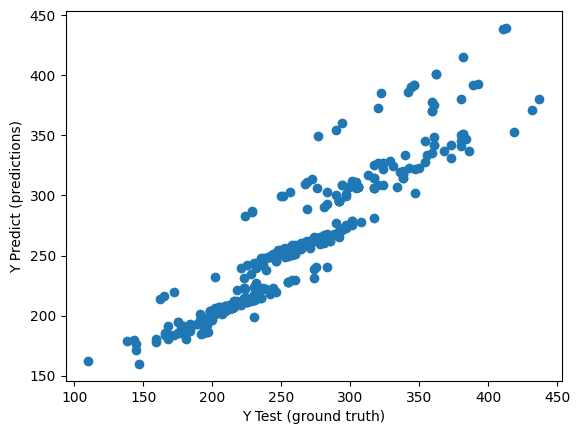

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y Test (ground truth)")
plt.ylabel("Y Predict (predictions)")

In [32]:
# Regresyon modelini değerlendiriyoruz.
from sklearn import metrics

In [33]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (Ortalama Mutlak Hata): ", mae)

Mean Absolute Error (Ortalama Mutlak Hata):  15.75014697940605


In [34]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  475.3936660420069
